# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 20, 'figure.figsize':(15, 8)})

In [2]:
# import dataset
df = pd.read_csv('winemag-data.csv')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [111]:
df.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [112]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [21]:
del df['Unnamed: 0']

In [114]:
df.select_dtypes(include='object').describe()

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,A little bit funky and unsettled when you pop ...,Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


In [115]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

describe(df)

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000
mad,2.598770,19.064838
skew,0.142833,11.820100


In [116]:
any(df.duplicated(keep=False))

True

In [117]:
df['country'].value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [118]:
d = pd.DataFrame(df['country'].value_counts())
d['percent'] = (d['country']/d['country'].sum())*100
d

,country,percent
US,62397,41.343051
Italy,23478,15.556071
France,21098,13.979129
Spain,8268,5.478218
Chile,5816,3.853570
Argentina,5631,3.730992
Portugal,5322,3.526255
Australia,4957,3.284413
New Zealand,3320,2.199768
Austria,3057,2.025509


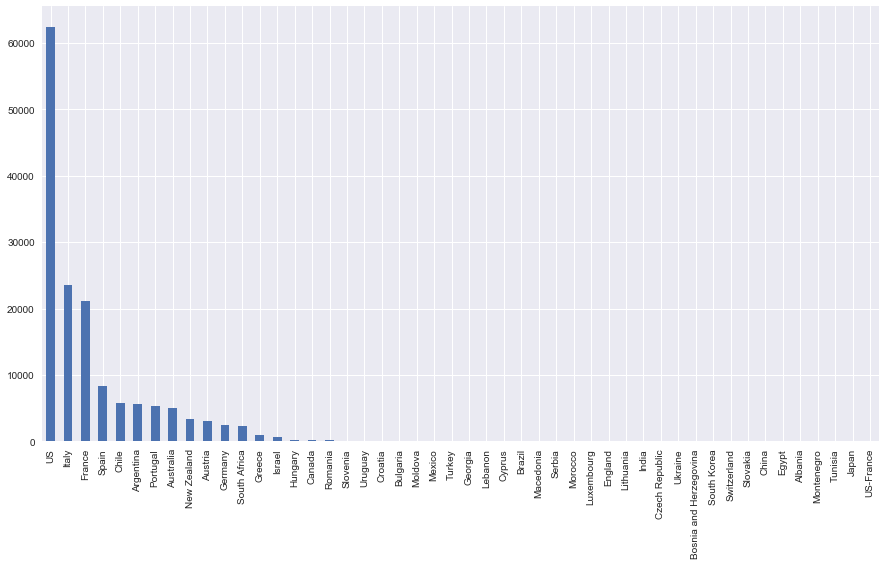

In [119]:
df['country'].value_counts().plot.bar()

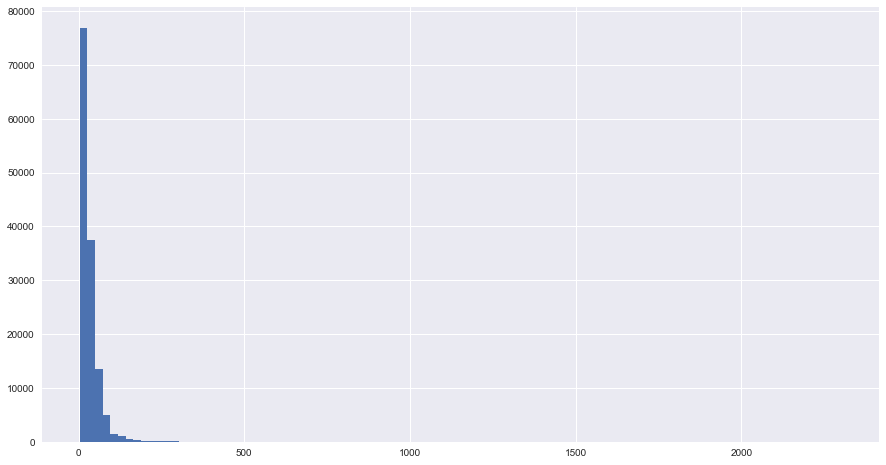

In [120]:
df['price'].hist(bins = 100)

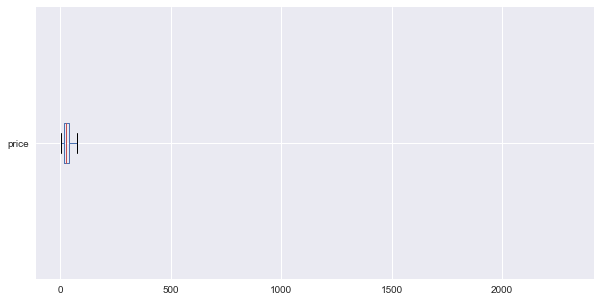

In [121]:
df['price'].plot(kind='box', vert=False, figsize=(10, 5))

In [11]:
df['is_expensive'] = df['price'].apply(lambda x: 'Yes' if x > 150 else 'No')

In [12]:
df['quality'] = pd.cut(df['points'], bins=3, labels=['low', 'medium', 'high'])

In [13]:
df['is_expensive'].value_counts()

No     149588
Yes      1342
Name: is_expensive, dtype: int64

In [14]:
df.groupby(['country', 'is_expensive'])['is_expensive'].count()

country                 is_expensive
Albania                 No                  2
Argentina               No               5618
                        Yes                13
Australia               No               4906
                        Yes                51
Austria                 No               3054
                        Yes                 3
Bosnia and Herzegovina  No                  4
Brazil                  No                 25
Bulgaria                No                 77
Canada                  No                196
Chile                   No               5799
                        Yes                17
China                   No                  3
Croatia                 No                 89
Cyprus                  No                 31
Czech Republic          No                  6
Egypt                   No                  3
England                 No                  9
France                  No              20521
                        Yes               5

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


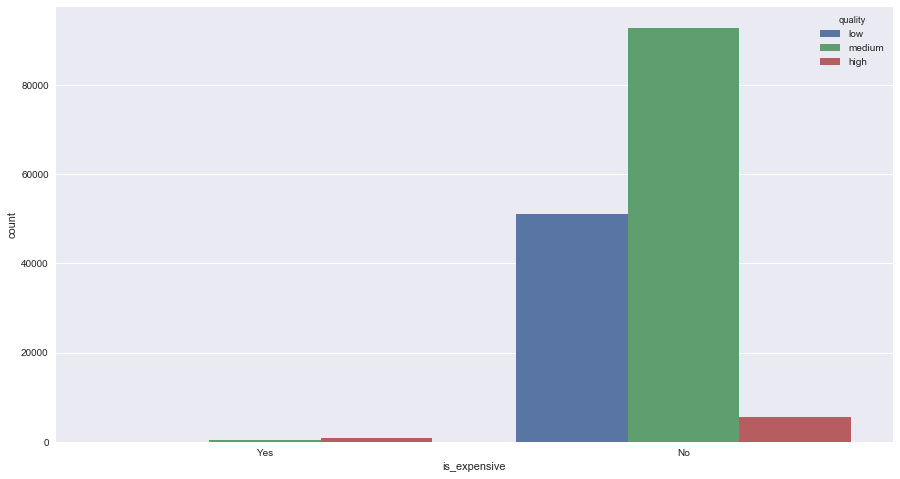

In [15]:
sns.countplot(x='is_expensive', hue='quality', data=df)

In [24]:
df[df['quality']=='high'].groupby(['is_expensive', 'winery'])['price'].describe()

count        mean         std  \
is_expensive winery                                                        
No           32 Winds                        1.0   59.000000         NaN   
             A.A. Badenhorst Family Wines    2.0   43.000000    0.000000   
             Aalto                           1.0  105.000000         NaN   
             Abacela                         1.0   45.000000         NaN   
             Abbadia Ardenga                 1.0   65.000000         NaN   
             Abeja                          21.0   52.095238   20.624996   
             Aberrant Cellars                1.0   45.000000         NaN   
             Acacia                          1.0   60.000000         NaN   
             Adelaida                        1.0   30.000000         NaN   
             Adelsheim                       6.0   87.500000   11.291590   
             Agricola Querciabella           2.0  104.000000    0.000000   
             Aia Vecchia                     6.0   38.333333    2.581989   
             Alain Brumont                   6.0   36.666667   11.690452   
             Alban                           0.0         NaN         NaN   
             Albert Bichot                   4.0   99.750000   10.688779   
             Albert Morot                    1.0   75.000000         NaN   
             Alex Gambal                     4.0  126.250000    2.500000   
             Alexandria Nicole               1.0   45.000000         NaN   
             Alfred Gratien                  4.0  130.500000   14.433757   
             Alienor                         3.0   65.000000    0.000000   
             Alloro                          4.0   65.000000   23.094011   
             Allram                          1.0   42.000000         NaN   
             Alma Rosa                       2.0   20.000000    0.000000   
             Almaviva                        1.0   75.000000         NaN   
             Alpha Omega                     6.0  106.000000   26.290683   
             Alphonse Mellot                 6.0   77.500000   18.074844   
             Alta Vista                      2.0   50.000000    0.000000   
             Altesino                        4.0  122.500000   40.104031   
             Alto Moncayo                    1.0   48.000000         NaN   
             Alvaro Castro                   2.0   65.000000    0.000000   
...                                          ...         ...         ...   
Yes          Shafer                          7.0  207.142857   16.293440   
             Sierra Cantabria                8.0  163.875000    9.387492   
             Sloan                           2.0  245.000000    0.000000   
             St. Urbans-Hof                  3.0  175.000000    0.000000   
             Stag's Leap Wine Cellars        2.0  202.500000   10.606602   
             Staglin                         5.0  177.000000    4.472136   
             Taittinger                      4.0  177.750000    4.500000   
             Taylor Fladgate                 5.0  285.400000  172.205691   
             Tenuta San Guido               10.0  212.900000   18.911784   
             Tenuta dell'Ornellaia          23.0  311.521739  123.439669   
             Tenuta di Biserno               1.0  419.000000         NaN   
             Terlato                         3.0  175.000000    0.000000   
             Teso La Monja                   7.0  237.142857   14.264508   
             The Vineyard House              1.0  200.000000         NaN   
             Torbreck                        4.0  213.750000   19.311050   
             Trefethen                       3.0  175.000000    0.000000   
             Tua Rita                        8.0  297.500000   72.801099   
             Valdicava                       1.0  275.000000         NaN   
             Vega Sicilia                    1.0  325.000000         NaN   
             Verité                          3.0  286.666667   23.094011   
             Ve

In [17]:
# filter outliers
upper_limit = df['price'].quantile(0.99) 

In [137]:
df = df[df['price'] < upper_limit]

In [138]:
df['price'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    135658.000000
mean         30.569786
std          21.601695
min           4.000000
25%          16.000000
50%          24.000000
75%          39.000000
90%          60.000000
95%          75.000000
99%         112.000000
max         149.000000
Name: price, dtype: float64